In [1]:
# Scrape per game data for 2021-2022 season by pandas
year = '2022'
str = 'https://www.basketball-reference.com/leagues/NBA_{}.html'

url = str.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2022.html'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import misc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
from PIL import Image

%matplotlib inline

In [79]:
abb_dict = {'Atlanta Hawks': 'ATL', 'Boston Celtics': 'BOS', 'Brooklyn Nets': 'BKN','Charlotte Hornets': 'CHA', 'Chicago Bulls': 'CHI', 'Cleveland Cavaliers': 'CLE',
            'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 'Detroit Pistons': 'DET', 'Golden State Warriors': 'GSW', 'Houston Rockets': 'HOU',
            'Indiana Pacers': 'IND', 'Los Angeles Clippers': 'LAC', 'Los Angeles Lakers': 'LAL', 'Memphis Grizzlies': 'MEM', 'Miami Heat': 'MIA',
            'Milwakuee Bucks': 'MIL', 'Minnesota Timberwolves': 'MIN', 'New Orleans Pelicans': 'NOP', 'New York Knicks': 'NYK',
            'Oklahoma City Thunder': 'OKC', 'Orlando Magic': 'ORL', 'Philadelphia 76ers': 'PHI', 'Phoenix Suns': 'PHX', 'Portland Trail Blazers': 'POR',
            'Sacramento Kings': 'SAC', 'Toronto Raptors': 'TOR','San Antonio Spurs': 'SAS' ,'Utah Jazz': 'UTA', 'Washington Wizards': 'WAS'}



In [80]:
team_names = []
team_abb = []
for key,value in abb_dict.items():
    team_names.append(key)
    team_abb.append(value)

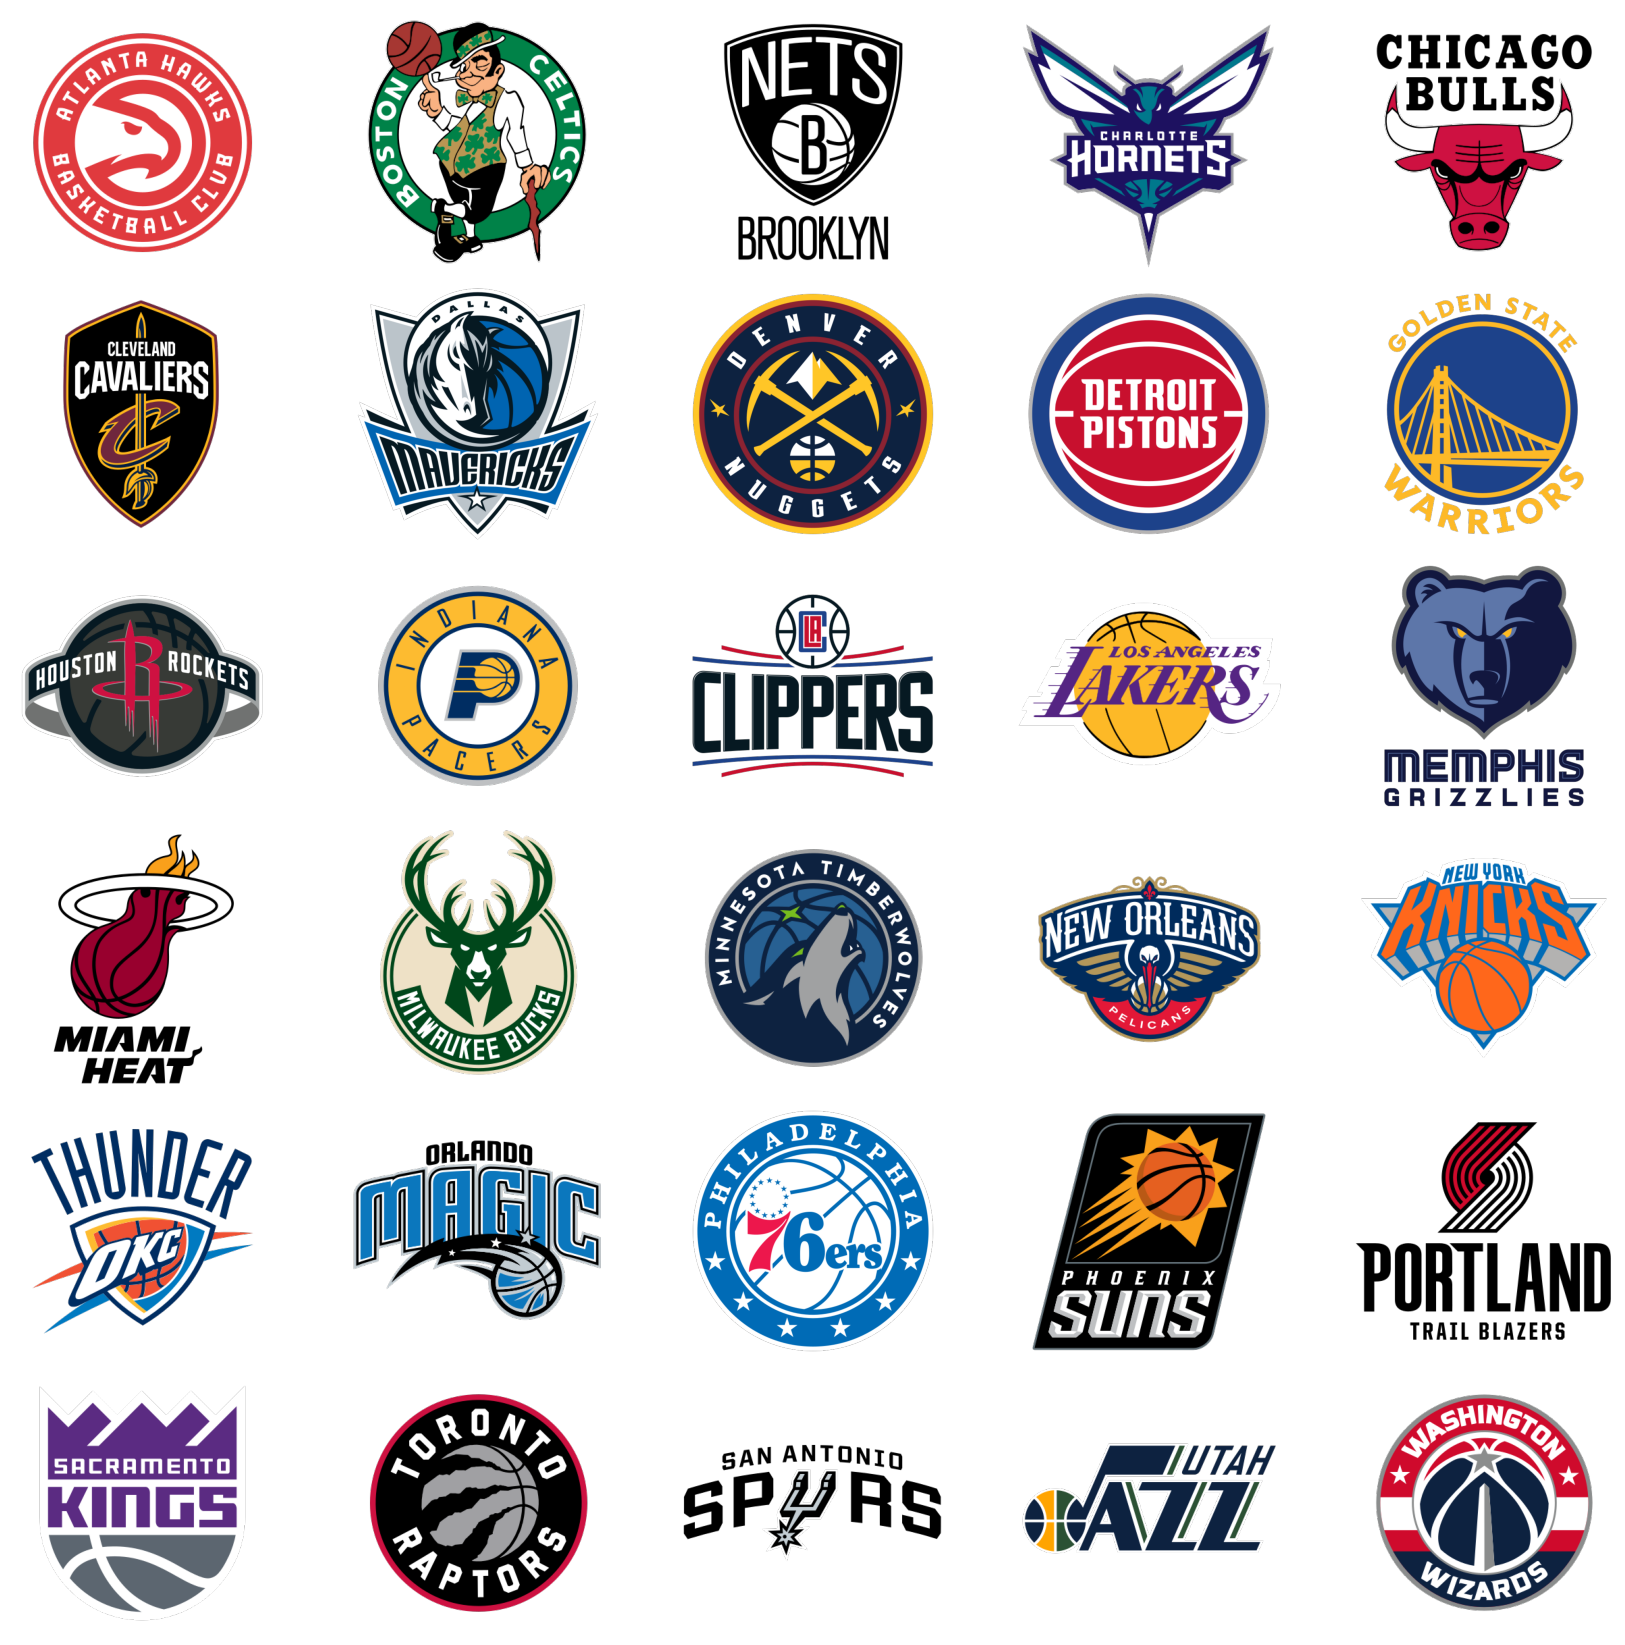

In [81]:
import matplotlib.image as mpimg
# use gridspec to create the subplots
plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(6, 5)
gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes. 

for i,name in enumerate(team_abb):
    ax1 = plt.subplot(gs1[i])
    img = mpimg.imread('nba_logo/png/{}_logo.png'.format(name))
    ax1.imshow(img) # plot image
    plt.gca().axis('off')

In [82]:
df = pd.read_html(url, header= 1)[10]

In [83]:
df_ratings = df.iloc[:, 0:20]

In [84]:
df_off_ratings = df_ratings.sort_values(by=['ORtg'], ascending=False)

In [85]:
df_off_ratings = df_ratings.sort_values(by=['Team'], ascending=True)

In [86]:
df_off_ratings

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Unnamed: 17,eFG%,TOV%
9,10.0,Atlanta Hawks,26.3,14.0,16.0,16,14,1.27,-0.36,0.91,113.8,112.5,1.3,97.5,0.234,0.367,0.568,NaN,0.532,11.3
10,11.0,Boston Celtics,26.0,16.0,16.0,17,15,1.25,0.55,1.80,109.3,108.1,1.2,97.2,0.243,0.408,0.554,NaN,0.515,12.5
5,6.0,Brooklyn Nets,30.2,21.0,9.0,18,12,3.40,-1.06,2.34,110.1,106.7,3.4,99.3,0.241,0.375,0.568,NaN,0.530,12.8
21,22.0,Charlotte Hornets,25.7,16.0,17.0,14,19,-2.21,0.73,-1.49,113.1,115.3,-2.2,100.3,0.222,0.404,0.564,NaN,0.536,11.2
7,8.0,Chicago Bulls,26.4,19.0,10.0,17,12,3.07,-0.59,2.48,111.2,108.1,3.1,98.3,0.236,0.344,0.568,NaN,0.530,12.0
3,4.0,Cleveland Cavaliers,24.7,19.0,13.0,22,10,5.38,0.73,6.11,109.6,104.1,5.5,97.4,0.236,0.408,0.567,NaN,0.533,14.3
14,15.0,Dallas Mavericks,27.0,15.0,15.0,15,15,0.03,0.04,0.07,108.8,108.8,0.0,95.6,0.221,0.435,0.546,NaN,0.515,11.2
17,18.0,Denver Nuggets,27.6,15.0,15.0,15,15,-0.20,0.50,0.30,109.6,109.8,-0.2,96.8,0.204,0.422,0.566,NaN,0.539,12.6
28,29.0,Detroit Pistons,23.5,5.0,25.0,7,23,-9.20,0.06,-9.14,101.2,110.5,-9.3,98.5,0.248,0.408,0.517,NaN,0.476,13.7
1,2.0,Golden State Warriors,28.3,25.0,6.0,25,6,10.48,-0.90,9.58,112.2,101.6,10.6,99.0,0.235,0.473,0.585,NaN,0.557,14.4


In [87]:
df_team_advanced = df_off_ratings[['Team', 'ORtg', 'DRtg','NRtg','Pace', 'FTr','3PAr','TS%','eFG%','TOV%']]

In [89]:
league_average = df_team_advanced[df_team_advanced['Team'] == 'League Average'].values

In [91]:
df_team_advanced.drop(df.loc[df_team_advanced['Team'] == 'League Average'].index, inplace=True)

C:\Users\90538\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
df_team_advanced

,Team,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%
9,Atlanta Hawks,113.8,112.5,1.3,97.5,0.234,0.367,0.568,0.532,11.3
10,Boston Celtics,109.3,108.1,1.2,97.2,0.243,0.408,0.554,0.515,12.5
5,Brooklyn Nets,110.1,106.7,3.4,99.3,0.241,0.375,0.568,0.530,12.8
21,Charlotte Hornets,113.1,115.3,-2.2,100.3,0.222,0.404,0.564,0.536,11.2
7,Chicago Bulls,111.2,108.1,3.1,98.3,0.236,0.344,0.568,0.530,12.0
3,Cleveland Cavaliers,109.6,104.1,5.5,97.4,0.236,0.408,0.567,0.533,14.3
14,Dallas Mavericks,108.8,108.8,0.0,95.6,0.221,0.435,0.546,0.515,11.2
17,Denver Nuggets,109.6,109.8,-0.2,96.8,0.204,0.422,0.566,0.539,12.6
28,Detroit Pistons,101.2,110.5,-9.3,98.5,0.248,0.408,0.517,0.476,13.7
1,Golden State Warriors,112.2,101.6,10.6,99.0,0.235,0.473,0.585,0.557,14.4


In [93]:
# get relevant data
DEF = df_team_advanced['DRtg'].values
OFF = df_team_advanced['ORtg'].values
names = df_team_advanced['Team'].values



In [172]:
def scatter_plot_with_logos(X,Y,names):   
    artists = []
    for d,o,name in zip(X,Y,names):
        plt.plot(d,o,'o',color='white', markersize=16)
        im = mpimg.imread('nba_logo/png/{}_logo.png'.format(name))
        im2 = OffsetImage(im, zoom=0.2,alpha=0.95)
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ab = AnnotationBbox(im2, (d, o),frameon=False)
        artists.append(ax.add_artist(ab))

Text(101.5, 100, 'By: UmutAlpaydin\nSource: Basketball-Reference\nDate: 23/12/2021')

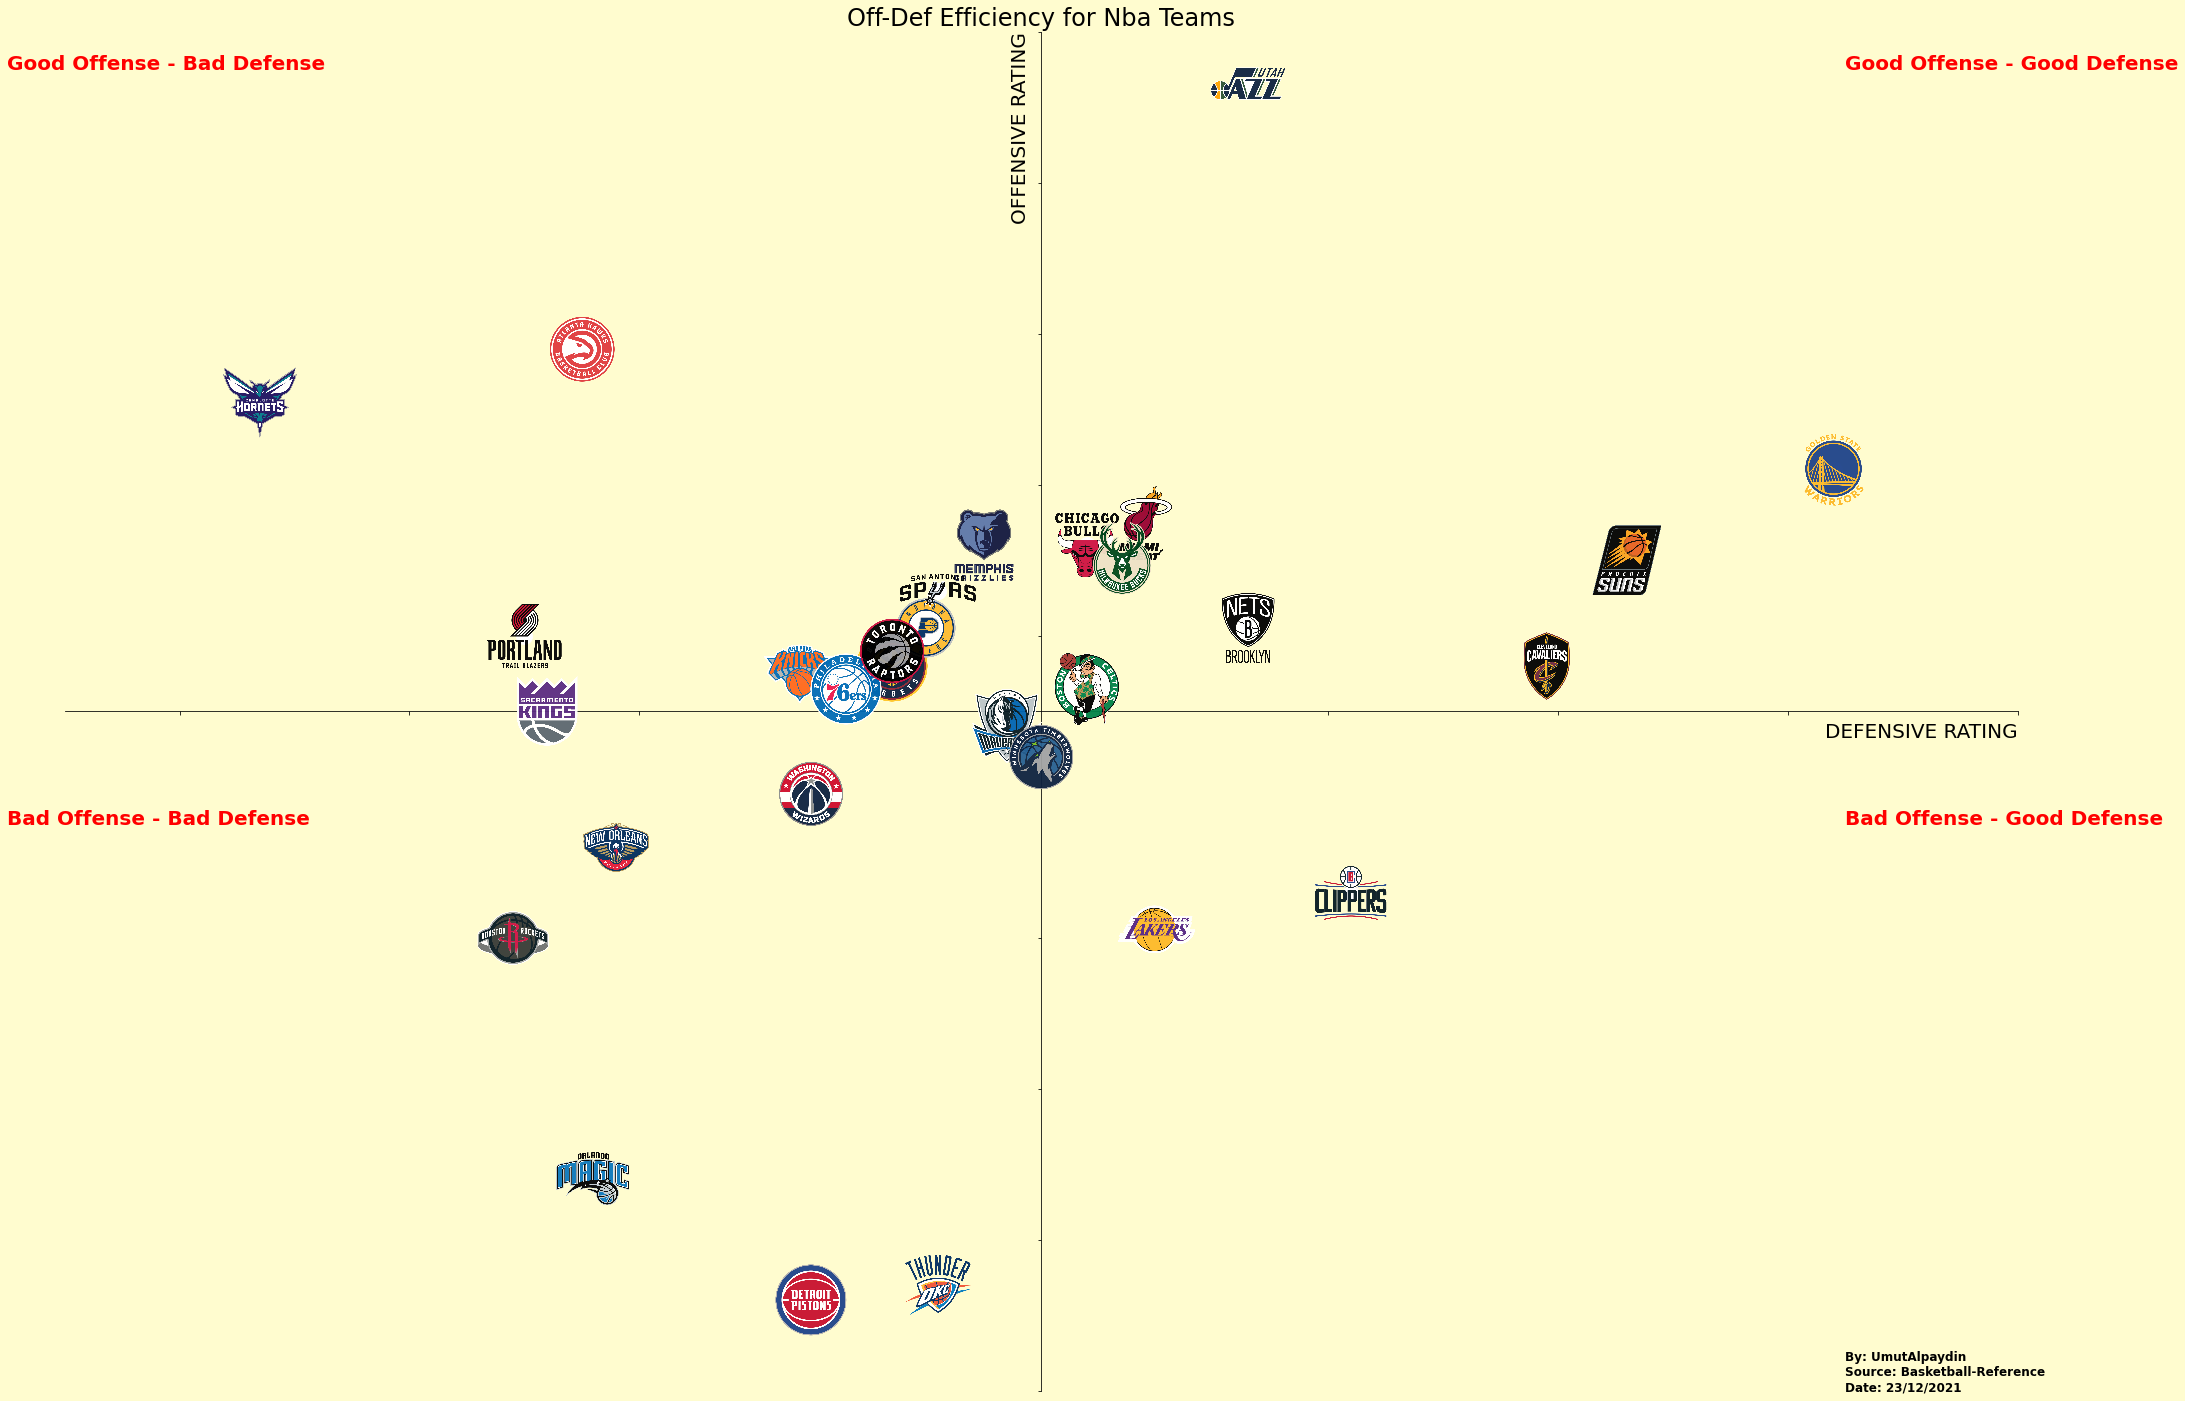

In [214]:
import warnings
from datetime import datetime

now = datetime.now() # current date and time
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(35,25))
fig.set_facecolor("#FFFCCF")
ax.set_facecolor("#FFFCCF")

# call function
scatter_plot_with_logos(DEF,OFF,team_abb)
# create labels and title 
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel('OFFENSIVE RATING',fontsize=20, loc='top')
plt.xlabel('DEFENSIVE RATING',fontsize=20, loc='right')
plt.ylim([100,118]);
plt.xlim([117,100]);
plt.title('Off-Def Efficiency for Nba Teams',fontsize=24)
date_time = now.strftime("%d/%m/%Y")
plt.text(101.5,117.5,'Good Offense - Good Defense',color='red',fontsize=20,weight = 'bold')
plt.text(117.5,117.5,'Good Offense - Bad Defense',color='red',fontsize=20,weight = 'bold')
plt.text(117.5,107.5,'Bad Offense - Bad Defense',color='red',fontsize=20,weight = 'bold')
plt.text(101.5,107.5,'Bad Offense - Good Defense',color='red',fontsize=20,weight = 'bold')
plt.text(101.5,100,'By: UmutAlpaydin\nSource: Basketball-Reference\nDate: {}'.format(date_time),color='black',fontsize=12,weight = 'bold')
